In [1]:
# Initial imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import statistics
import seaborn as sns
import os

In [2]:
# 1. Create a DataFrame for the 201908-citibike-tripdata data. 
uber_df = pd.read_csv("Uber_Trip_2.csv", low_memory=False)
uber_df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
2,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
3,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
4,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
648,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
649,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
650,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
651,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [3]:
uber_df.describe()

,MILES
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [4]:
uber_df["CATEGORY"].unique()

array(['Business', 'Personal'], dtype=object)

In [5]:
sum(uber_df['CATEGORY']=='Business')

647

In [6]:
sum(uber_df['CATEGORY']=='Personal')

6

In [7]:
total_uber_count = uber_df.groupby(['CATEGORY']).sum()['MILES']
total_uber_count

CATEGORY
Business    7097.7
Personal     213.5
Name: MILES, dtype: float64

In [8]:
uber_df["PURPOSE"].unique()

array(['Meal/Entertain', 'Errand/Supplies', 'Meeting', 'Customer Visit',
       'Temporary Site', 'Between Offices', 'Charity ($)', 'Commute',
       'Moving', 'Airport/Travel'], dtype=object)

In [9]:
sum(uber_df['PURPOSE']=='Meal/Entertain')

160

In [10]:
sum(uber_df['PURPOSE']=='Errand/Supplies')

128

In [11]:
sum(uber_df['PURPOSE']=='Meeting')

187

In [12]:
sum(uber_df['PURPOSE']=='Customer Visit')

101

In [13]:
sum(uber_df['PURPOSE']=='Temporary Site')

50

In [14]:
sum(uber_df['PURPOSE']=='Between Offices')

18

In [15]:
sum(uber_df['PURPOSE']=='Charity ($)')

1

In [16]:
sum(uber_df['PURPOSE']=='Commute')

1

In [17]:
sum(uber_df['PURPOSE']=='Moving')

4

In [18]:
sum(uber_df['PURPOSE']=='Airport/Travel')

3

In [19]:
ride_uber_count = uber_df.groupby(['PURPOSE']).sum()['MILES']
ride_uber_count

PURPOSE
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES, dtype: float64

In [20]:
uber_df['START_DATE'] = pd.to_datetime(uber_df['START_DATE'], errors='coerce')
uber_df['END_DATE'] = pd.to_datetime(uber_df['END_DATE'], errors='coerce')

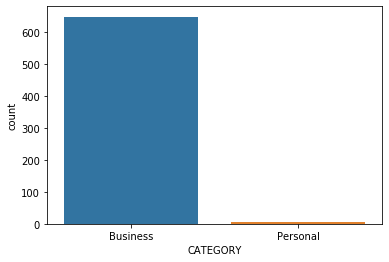

In [21]:
sns.countplot(x=uber_df['CATEGORY']);

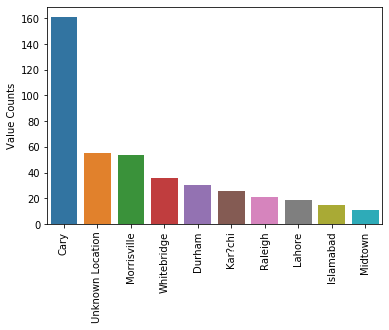

In [22]:
start_labels = uber_df.START.value_counts().nlargest(10)
sns.barplot(x=start_labels.index, y=start_labels);
plt.ylabel('Value Counts');
plt.xticks(rotation=90);

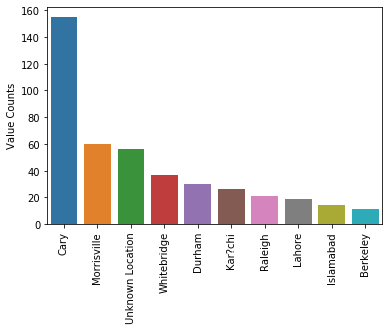

In [23]:
stop_labels = uber_df.STOP.value_counts().nlargest(10)
sns.barplot(x=stop_labels.index, y=stop_labels);
plt.ylabel('Value Counts');
plt.xticks(rotation=90);

In [24]:
uber_df['MONTH'] = pd.DatetimeIndex(uber_df['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep',
      10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec' }
uber_df["MONTH"] = uber_df.MONTH.map(month_label)
uber_df.MONTH.unique()

array(['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Oct',
       'Nov', 'Dec'], dtype=object)

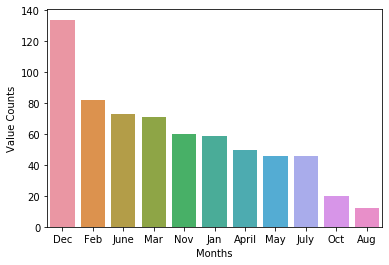

In [25]:
month_count = uber_df.MONTH.value_counts()
sns.barplot(x=month_count.index, y=month_count);
plt.xlabel('Months')
plt.ylabel('Value Counts');

In [26]:
miles_dic = {}
for i in uber_df.MILES:
    if i < 10:
        if '0-10 miles' not in miles_dic:
            miles_dic['0-10 miles'] = [i]
        else:
            miles_dic['0-10 miles'].append(i)
            
    elif i >= 10 and i < 20:
        if '10-20 miles' not in miles_dic:
            miles_dic['10-20 miles'] = [i]
        else:
            miles_dic['10-20 miles'].append(i)
    
    elif i >= 20 and i < 30:
        if '20-30 miles' not in miles_dic:
            miles_dic['20-30 miles'] = [i]
        else:
            miles_dic['20-30 miles'].append(i)
            
    elif i >= 30 and i < 40:
        if '30-40 miles' not in miles_dic:
            miles_dic['30-40 miles'] = [i]
        else:
            miles_dic['30-40 miles'].append(i)
            
    elif i >= 40 and i < 50:
        if '40-50 miles' not in miles_dic:
            miles_dic['40-50 miles'] = [i]
        else:
            miles_dic['40-50 miles'].append(i)
    else:
        if 'Above 50 miles' not in miles_dic:
            miles_dic['Above 50 miles'] = [i]
        else:
            miles_dic['Above 50 miles'].append(i)

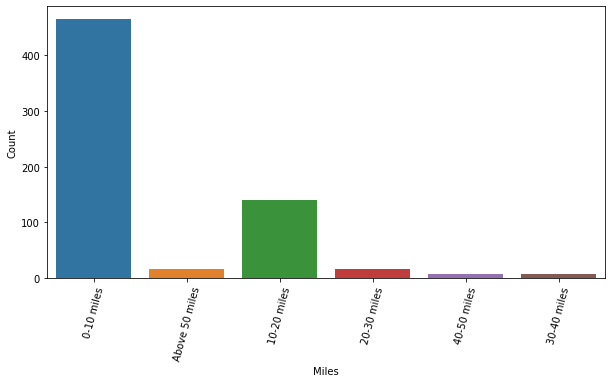

In [27]:
len_miles = []
for key in miles_dic:
    len_miles.append((key, len(miles_dic[key])))
a, b = [], []
for i, j in len_miles:
    a.append(i)
    b.append(j)
plt.figure(figsize=(10, 5))
plt.xticks(rotation=75)
sns.barplot(x=a, y=b)
plt.xlabel('Miles')
plt.ylabel('Count');

In [28]:
uber_df['DAY'] = uber_df.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
uber_df['DAY'] = uber_df['DAY'].map(day_label)

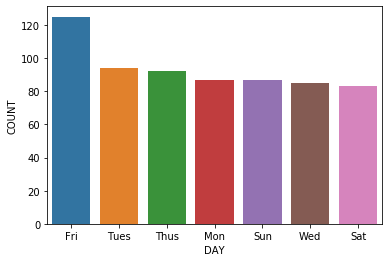

In [29]:
day_label = uber_df.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT');

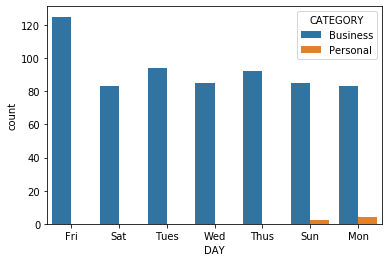

In [30]:
sns.countplot(hue='CATEGORY', x='DAY', data=uber_df);

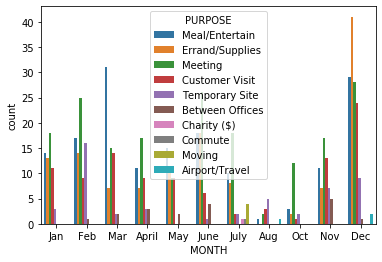

In [31]:
sns.countplot(hue='PURPOSE', x='MONTH', data=uber_df);

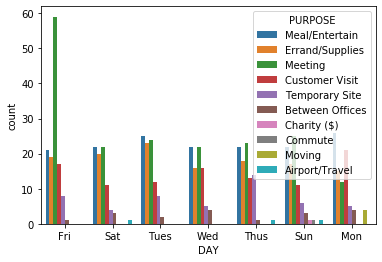

In [32]:
sns.countplot(hue='PURPOSE', x='DAY', data=uber_df);

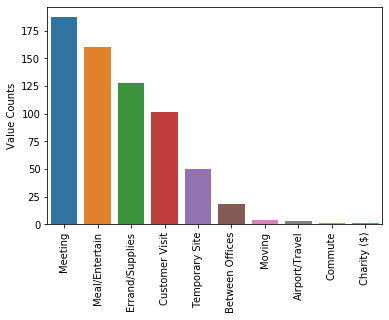

In [33]:
purpose_labels = uber_df.PURPOSE.value_counts().nlargest(10)
sns.barplot(x=purpose_labels.index, y=purpose_labels);
plt.ylabel('Value Counts');
plt.xticks(rotation=90);